# Notebook error analysis 

## Manual labels of the sampled errors

in terms of bug types and root causes

Filter out / exclude:

    ML_pipeline == non-applicable/unknown
    Other==self-raised/should exclude/intentional

In [1]:
# import importlib
# importlib.reload(config)
# import config

In [1]:
import pandas as pd
import config
import visualization_util

# # config
# df_mlerr_label_config = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_config.xlsx'),
#                                 keep_default_na=False)
# exclude_config = ["label_if_error_chain"] # because it is the same as root cause==nb specific-previous cell error
# df_mlerr_label_config.drop(exclude_config, axis=1, inplace=True)
# # data
# df_mlerr_labels_g = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_g.xlsx'))
# df_mlerr_labels_k = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_k.xlsx'))

# summed config
# config
df_mlerr_label_config_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_config_sum.xlsx'),
                                keep_default_na=False)
exclude_config = ["label_if_error_chain"] # because it is the same as root cause==nb specific-previous cell error
df_mlerr_label_config_sum.drop(exclude_config, axis=1, inplace=True)
# data
df_mlerr_labels_g_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_g_sum.xlsx'))
df_mlerr_labels_k_sum = pd.read_excel(config.path_default.joinpath('data_dedup_cluster/df_err_processed_pregroup_sampled4_k_sum.xlsx'))

path_default=WindowsPath('C:/Users/yirwa29/Downloads/Dataset-Nb')


In [2]:
# before filtering
print(df_mlerr_labels_g_sum.eid.nunique())
print(df_mlerr_labels_k_sum.eid.nunique())

390
356


In [6]:
# exclude_ml_pipeline = ['not-applicable (sub-labels needed, e.g., tutorials, physics simulation, ..)',
#                        'not applicable - tutorial notebook',
#                        'not applicable - physics',
#                        'not applicable - education',
#                        'unknown']
exclude_other = ['should exclude'] #['intentional', 'should exclude']
exclude_ml_pipeline_sum = ['unknown']#['not applicable','unknown']
# df_mlerr_labels_g_exed = df_mlerr_labels_g[(~df_mlerr_labels_g.label_ML_pipeline.isin(exclude_ml_pipeline))&(~df_mlerr_labels_g.other.isin(exclude_other))]
# df_mlerr_labels_k_exed = df_mlerr_labels_k[(~df_mlerr_labels_k.label_ML_pipeline.isin(exclude_ml_pipeline))&(~df_mlerr_labels_k.other.isin(exclude_other))]
df_mlerr_labels_g_sum = df_mlerr_labels_g_sum[(~df_mlerr_labels_g_sum.label_ML_pipeline.isin(exclude_ml_pipeline_sum))&(~df_mlerr_labels_g_sum.other.isin(exclude_other))]
df_mlerr_labels_k_sum = df_mlerr_labels_k_sum[(~df_mlerr_labels_k_sum.label_ML_pipeline.isin(exclude_ml_pipeline_sum))&(~df_mlerr_labels_k_sum.other.isin(exclude_other))]

In [7]:
# after filtering
print(df_mlerr_labels_g_sum.eid.nunique())
print(df_mlerr_labels_k_sum.eid.nunique())

383
344


[cmap](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

[0.32, 0.11, 0.1, 0.1, 0.08, 0.08, 0.06, 0.04, 0.03, 0.08999999999999998]


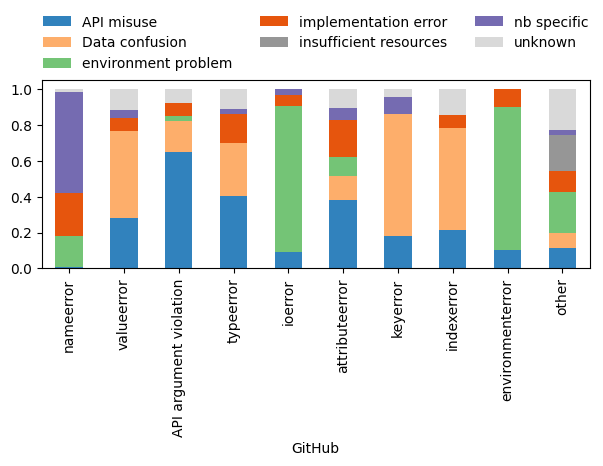

[0.28, 0.13, 0.12, 0.11, 0.08, 0.08, 0.07, 0.03, 0.03, 0.060000000000000005]


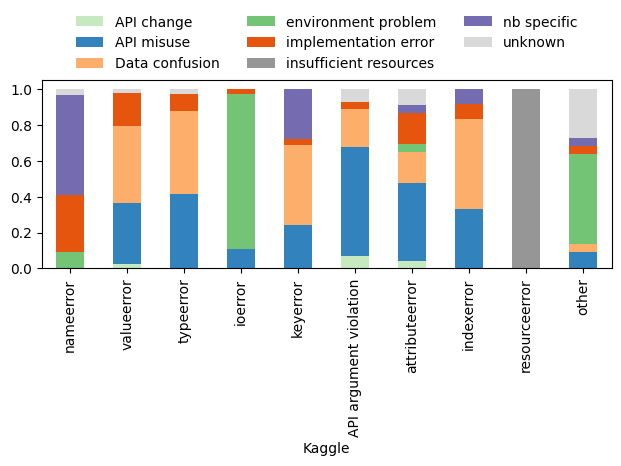

In [60]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

rc2colormap = {"API misuse":0,"Data confusion":6,"implementation error":4,"environment problem":9,
             "nb specific":12,"API change":11,"insufficient resources":17,"unknown":19}

def plot_relationship_stackedbar(x_var, y_var, df, source="Kaggle",include_num=9):
    df_grouped = df.groupby(x_var)[y_var].value_counts().unstack(y_var)
    df_grouped_sorted = df[x_var].value_counts().sort_values(ascending=False)
    df_grouped_sorted = (df_grouped_sorted/df_grouped_sorted.sum()).round(2)
    print(df_grouped_sorted[:include_num].to_list()+[sum(df_grouped_sorted[include_num:])])
    df_grouped = df_grouped.reindex(df_grouped_sorted.index)
    df_other = pd.DataFrame(df_grouped[include_num:].sum(axis=0)).T.rename(index={0: "other"})
    df_grouped = pd.concat([df_grouped[:include_num], df_other])
    df_grouped = (df_grouped.T/df_grouped.sum(axis=1)).T

    cmap = colors.ListedColormap([plt.cm.tab20c.colors[rc2colormap[x]] for x in df_grouped.columns])
    
    df_grouped.plot.bar(stacked=True, cmap=cmap)
    
    plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3,
    )
    plt.xlabel(source)
    plt.tight_layout()
    plt.show()
    
plot_relationship_stackedbar("label_refined_exp_type", "label_root_cause", df_mlerr_labels_g_sum, "GitHub")
plot_relationship_stackedbar("label_refined_exp_type", "label_root_cause", df_mlerr_labels_k_sum, "Kaggle")

In [9]:
# Summarize the statistics - df_mlerr_labels_sum
# github stats
cluster_res_g_sum = visualization_util.statistics_labels(df_mlerr_label_config_sum, df_mlerr_labels_g_sum)
for label_key in df_mlerr_label_config_sum:
    cluster_res_g_sum[label_key] = pd.DataFrame.from_dict(cluster_res_g_sum[label_key]).rename_axis('cluster_id').reset_index()
# for all clusters    
cluster_res_g_sum_weighted_sum = visualization_util.cal_weighted_sum(df_mlerr_label_config_sum, cluster_res_g_sum)

# kaggle stats
cluster_res_k_sum = visualization_util.statistics_labels(df_mlerr_label_config_sum, df_mlerr_labels_k_sum)
for label_key in df_mlerr_label_config_sum:
    cluster_res_k_sum[label_key] = pd.DataFrame.from_dict(cluster_res_k_sum[label_key]).rename_axis('cluster_id').reset_index()
cluster_res_k_sum_weighted_sum = visualization_util.cal_weighted_sum(df_mlerr_label_config_sum, cluster_res_k_sum)

In [10]:
rc = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_root_cause'],
                   cluster_res_g_sum_weighted_sum['label_root_cause']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
rc['Kaggle']=(rc['Kaggle']/rc['Kaggle'].sum()).round(2)
rc['GitHub']=(rc['GitHub']/rc['GitHub'].sum()).round(2)
rc

,Kaggle,GitHub
API misuse,0.21,0.19
Data confusion,0.20,0.17
nb specific,0.20,0.23
environment problem,0.16,0.20
implementation error,0.15,0.16
insufficient resources,0.03,0.01
unknown,0.03,0.04
API change,0.01,0.00


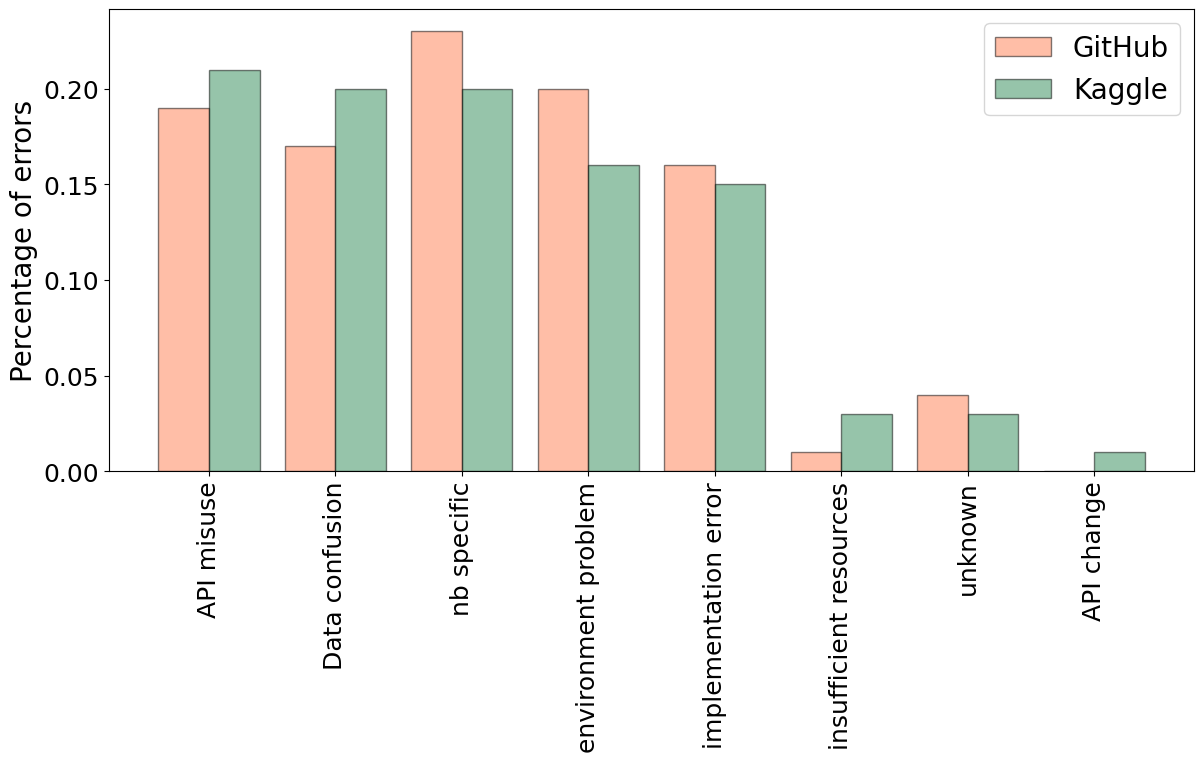

In [18]:
ind = np.arange(len(rc.index))

width = 0.4
fontsize = 20
plt.figure(figsize=(14,6))
plt.bar(ind - width / 2, rc.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
plt.bar(ind + width / 2, rc.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black') 
  
plt.xticks(ind, rc.index, rotation=90, fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.xlabel("Exception types", fontsize=fontsize) 
plt.ylabel("Percentage of errors", fontsize=fontsize) 
plt.legend(fontsize=fontsize) 
plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/ml_root cause.pdf", bbox_inches='tight')
plt.show()

In [11]:
bt = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_refined_exp_type'],
                   cluster_res_g_sum_weighted_sum['label_refined_exp_type']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
bt['Kaggle']=(bt['Kaggle']/bt['Kaggle'].sum()).round(2)
bt['GitHub']=(bt['GitHub']/bt['GitHub'].sum()).round(2)
bt

,Kaggle,GitHub
nameerror,0.30,0.36
valueerror,0.13,0.12
ioerror,0.11,0.10
typeerror,0.11,0.07
API argument violation,0.09,0.10
keyerror,0.08,0.04
attributeerror,0.07,0.08
resourceerror,0.03,0.01
indexerror,0.03,0.03
environmenterror,0.02,0.03


In [14]:
mlbug = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_if_ML_bug'],
                   cluster_res_g_sum_weighted_sum['label_if_ML_bug']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
mlbug['Kaggle']=(mlbug['Kaggle']/mlbug['Kaggle'].sum()).round(2)
mlbug['GitHub']=(mlbug['GitHub']/mlbug['GitHub'].sum()).round(2)
mlbug[:2]

,Kaggle,GitHub
ML bug,0.73,0.63
python bug,0.27,0.37


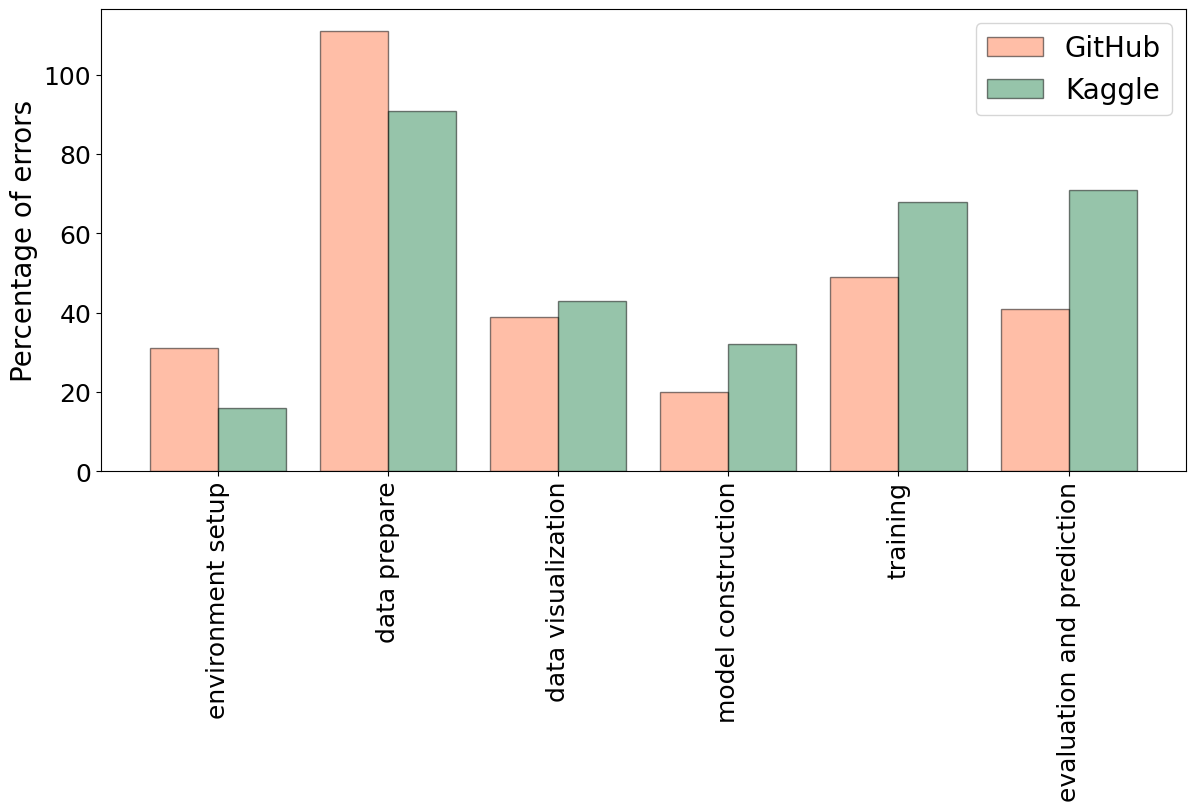

,Kaggle,GitHub
environment setup,16,31
data prepare,91,111
data visualization,43,39
model construction,32,20
training,68,49
evaluation and prediction,71,41


In [16]:
import numpy as np

mlpp = pd.DataFrame([cluster_res_k_sum_weighted_sum['label_ML_pipeline'],
                     cluster_res_g_sum_weighted_sum['label_ML_pipeline']]).T.rename(columns={0: 'Kaggle', 1: 'GitHub'})
# mlpp['Kaggle']=(mlpp['Kaggle']/mlpp['Kaggle'].sum()).round(2)
# mlpp['GitHub']=(mlpp['GitHub']/mlpp['GitHub'].sum()).round(2)
mlpp = mlpp.reindex(["environment setup", "data prepare", "data visualization", "model construction", "training", "evaluation and prediction"])

ind = np.arange(len(mlpp.index))

width = 0.4
fontsize = 20
plt.figure(figsize=(14,6))
plt.bar(ind - width / 2, mlpp.GitHub, width, label = 'GitHub', alpha = 0.5, color = 'coral', edgecolor = 'black') 
plt.bar(ind + width / 2, mlpp.Kaggle, width, label = 'Kaggle', alpha = 0.5, color = 'seagreen', edgecolor = 'black') 
  
plt.xticks(ind, mlpp.index, rotation=90, fontsize=fontsize-2)
plt.yticks(fontsize=fontsize-2)
# plt.xlabel("Exception types", fontsize=fontsize) 
plt.ylabel("Percentage of errors", fontsize=fontsize) 
plt.legend(fontsize=fontsize) 
plt.savefig(r"C:\Users\yirwa29\OneDrive - Linköpings universitet\SAProject\Paper2/ml_pipeline.pdf", bbox_inches='tight')
plt.show()

mlpp

label_root_cause 2
Chi2ContingencyResult: pvalue is  0.995350549903933 (Not statistically different)


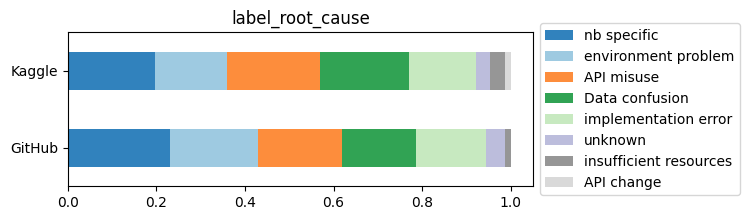

label_ML_pipeline 2
Chi2ContingencyResult: pvalue is  0.03596999308750023 (Statistically different)


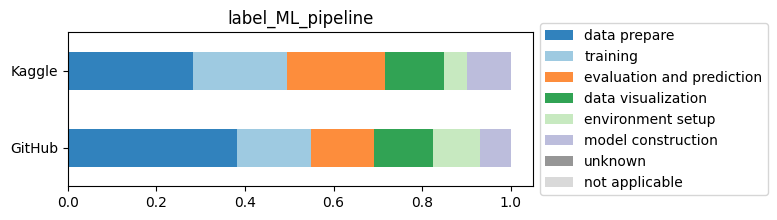

label_if_ML_bug 1
Chi2ContingencyResult: pvalue is  0.008555990412985853 (Statistically different)


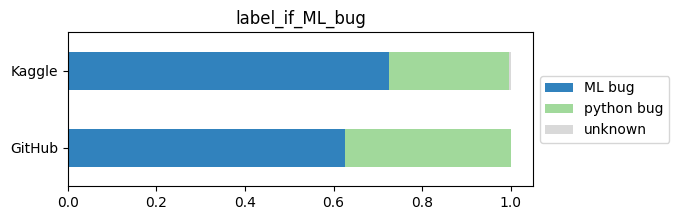

label_refined_exp_type 5
Chi2ContingencyResult: pvalue is  0.8513610498818229 (Not statistically different)


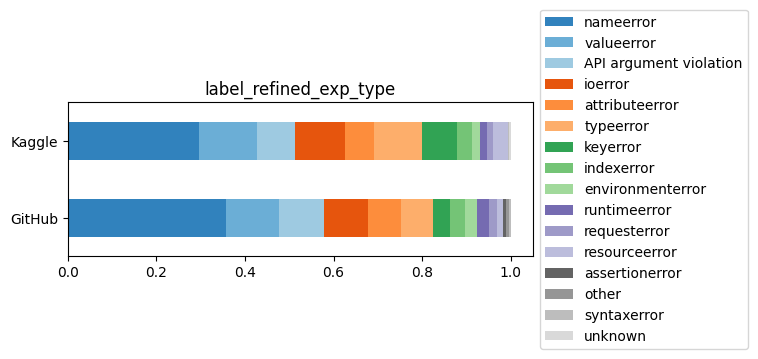

label_if_runinfo_help 0
Chi2ContingencyResult: pvalue is  0.02065055090540317 (Statistically different)


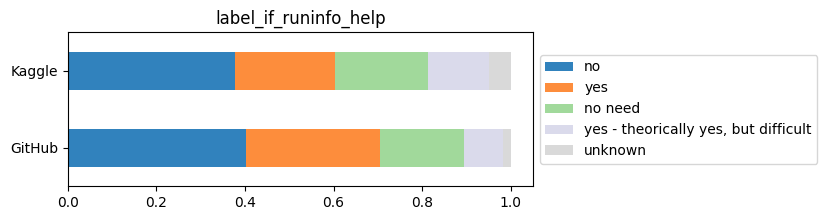

label_if_code_error_align 1
Chi2ContingencyResult: pvalue is  0.9271097582075327 (Not statistically different)


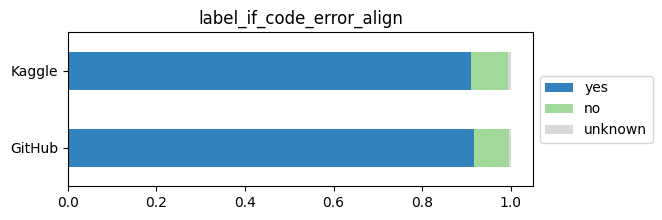

label_if_error_chain 0
Chi2ContingencyResult: pvalue is  0.07268841126117276 (Not statistically different)


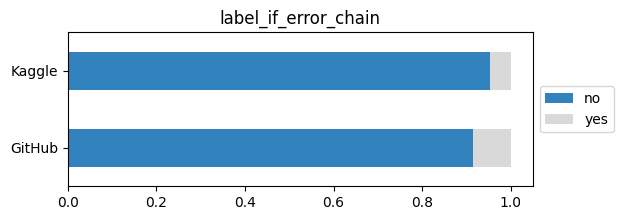

other 4
Chi2ContingencyResult: pvalue is  1.0 (Not statistically different)


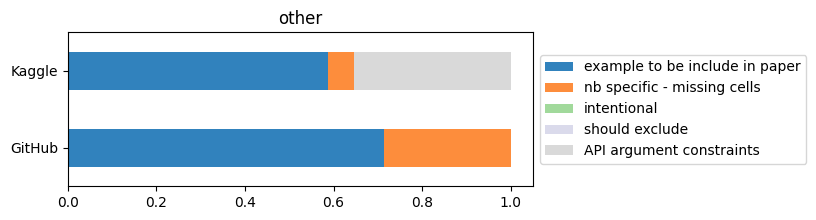

In [17]:
import matplotlib.pyplot as plt

# plot stacked bar chart to compare GitHub and Kaggle over each categories
for label_key in df_mlerr_label_config_sum:
    bar_label_key_gk = pd.DataFrame({"GitHub": cluster_res_g_sum_weighted_sum[label_key],
                                     "Kaggle": cluster_res_k_sum_weighted_sum[label_key]})
    bar_label_key_gk = bar_label_key_gk.div(bar_label_key_gk.sum(axis=0), axis=1)
    # plot
    bar_label_key_gk.T.plot(kind="barh", stacked=True, figsize=(6,2), colormap='tab20c')
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(label_key)
    plt.show()